In [2]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mglearn.plots

<module 'mglearn.plots' from '/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/mglearn/plots.py'>

In [4]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [5]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

In [ ]:
Now we will construct our parameter grid

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [7]:
# Carry out the search 
gs.fit(X_train, y_train)

/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 0, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [8]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [9]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.218597,0.011699,0.014949,0.000552,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.874605,0.875755,...,0.875166,0.002297,32,0.887027,0.882569,0.886092,0.891997,0.881642,0.885865,0.003680
1,0.982960,0.036812,0.030477,0.002642,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.878343,0.881219,...,0.878905,0.002491,31,0.887890,0.889976,0.888537,0.888114,0.889121,0.888727,0.000752
2,1.963573,0.038791,0.047835,0.001506,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880357,0.884958,...,0.882759,0.003113,26,0.889185,0.890119,0.889832,0.891997,0.891781,0.890583,0.001111
3,3.882479,0.100493,0.081322,0.001175,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.882945,0.885821,...,0.882931,0.002035,25,0.892205,0.890623,0.890191,0.892069,0.889912,0.891000,0.000957
4,0.003969,0.000100,0.000000,0.000000,5,0,10,"{'max_depth': 5, 'max_features': 0, 'n_estimat...",NaN,NaN,...,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.003992,0.000153,0.000000,0.000000,5,0,50,"{'max_depth': 5, 'max_features': 0, 'n_estimat...",NaN,NaN,...,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.004031,0.000153,0.000000,0.000000,5,0,100,"{'max_depth': 5, 'max_features': 0, 'n_estimat...",NaN,NaN,...,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.003955,0.000115,0.000000,0.000000,5,0,200,"{'max_depth': 5, 'max_features': 0, 'n_estimat...",NaN,NaN,...,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.739219,0.007144,0.014599,0.000180,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.876618,0.872879,...,0.878963,0.005359,30,0.887818,0.888250,0.888034,0.889336,0.893507,0.889389,0.002124
9,3.664033,0.077930,0.032236,0.002779,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.873454,0.875755,...,0.882587,0.007172,27,0.889185,0.891270,0.892061,0.896815,0.894801,0.892826,0.002686


Let's look at only the most relevant rows

In [10]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [ ]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

In [14]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()


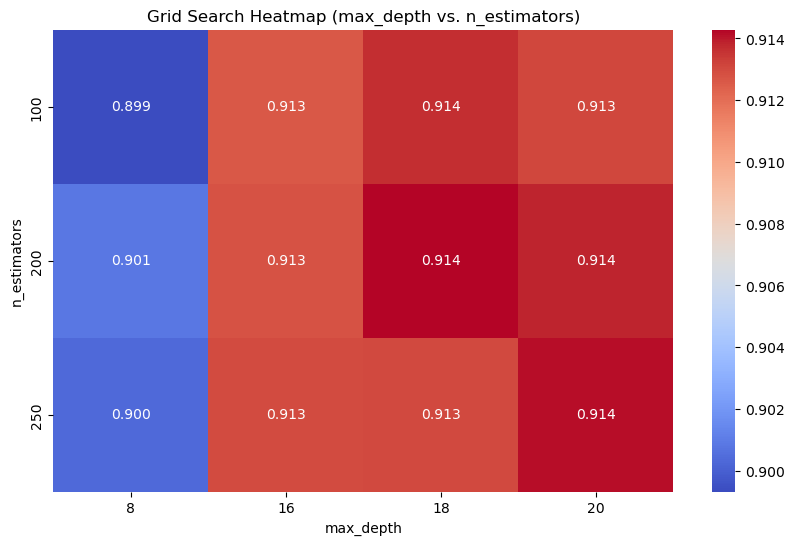

In [16]:
# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [8,16,18, 20],
    "n_estimators": [100,200,250]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.